In [1]:
# Core Libraries - Data manipulation and analysis
import pandas as pd
import numpy as np
import math
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
  
# Core Libraries - Machine Learning
import sklearn
import xgboost as xgb


# Importing Classifiers - Modelling
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

## Importing train_test_split,cross_val_score,GridSearchCV,KFold - Validation and Optimization
from sklearn.model_selection import  train_test_split, cross_val_score, GridSearchCV, KFold 


# Importing Metrics - Performance Evaluation
from sklearn import metrics

# Warnings Library - Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import pickle


### Loading Data

In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' ,skiprows = 1, header = None)

In [3]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship',
                  'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [4]:
%matplotlib inline

In [5]:
print(train_set.shape, test_set.shape)

(32561, 15) (16281, 15)


In [6]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


### Analyzing the Data

In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
train_set.get_dtype_counts()

int64     6
object    9
dtype: int64

In [10]:
test_set.get_dtype_counts()

int64     6
object    9
dtype: int64

### Checking null values

In [11]:
num_cols = train_set.select_dtypes(include="int64").columns.values

In [12]:
train_set[num_cols].isna().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [13]:
test_set[num_cols].isna().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

### Checking for columns with all zeroes

In [14]:
train_set.loc[(train_set==0).all(axis=1),num_cols].shape

(0, 6)

In [15]:
test_set.loc[(test_set==0).all(axis=1),num_cols].shape

(0, 6)

In [16]:
train_set.loc[(train_set==0).all(axis=1),num_cols]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week


### Now there are no columns with all zeros and hence we will clean Categorical columns

In [17]:
ctg_cols = train_set.select_dtypes(include="object").columns.values
ctg_cols

array(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'wage_class'],
      dtype=object)

In [18]:
train_set[ctg_cols].isna().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
wage_class        0
dtype: int64

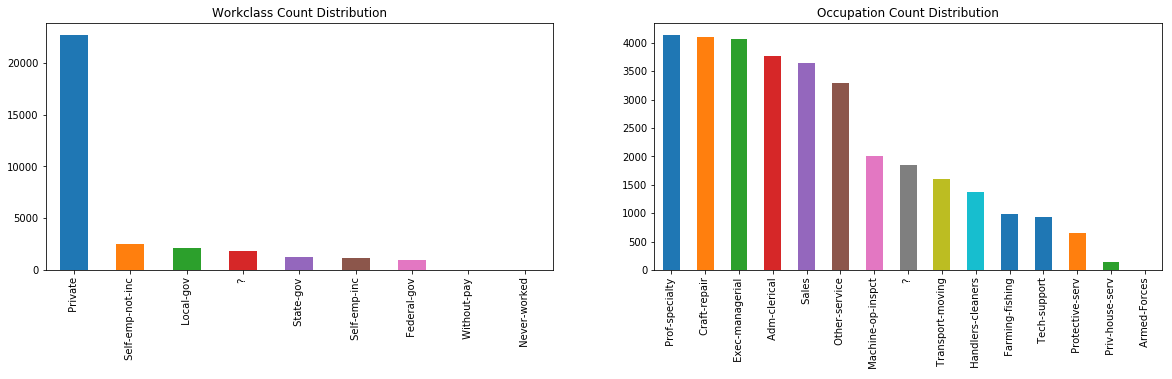

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1) 
plt.title("Workclass Count Distribution")
train_set['workclass'].value_counts().plot.bar()

plt.subplot(2,2,2) 
plt.title("Occupation Count Distribution")
train_set['occupation'].value_counts().plot.bar()

### Column has '?' as values , that seems to be a bad data. So removing those data 

In [20]:
train_set.drop(train_set.loc[(train_set==" ?").any(axis=1)].index, inplace= True)
train_set.shape[0]

30162

In [21]:
test_set.drop(test_set.loc[(test_set==" ?").any(axis=1)].index, inplace= True)
test_set.shape[0]

15060

### Some statistical info

In [22]:
train_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [23]:
train_set.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
education_num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
capital_gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
capital_loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
hours_per_week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


### Data exploration (Univariate)

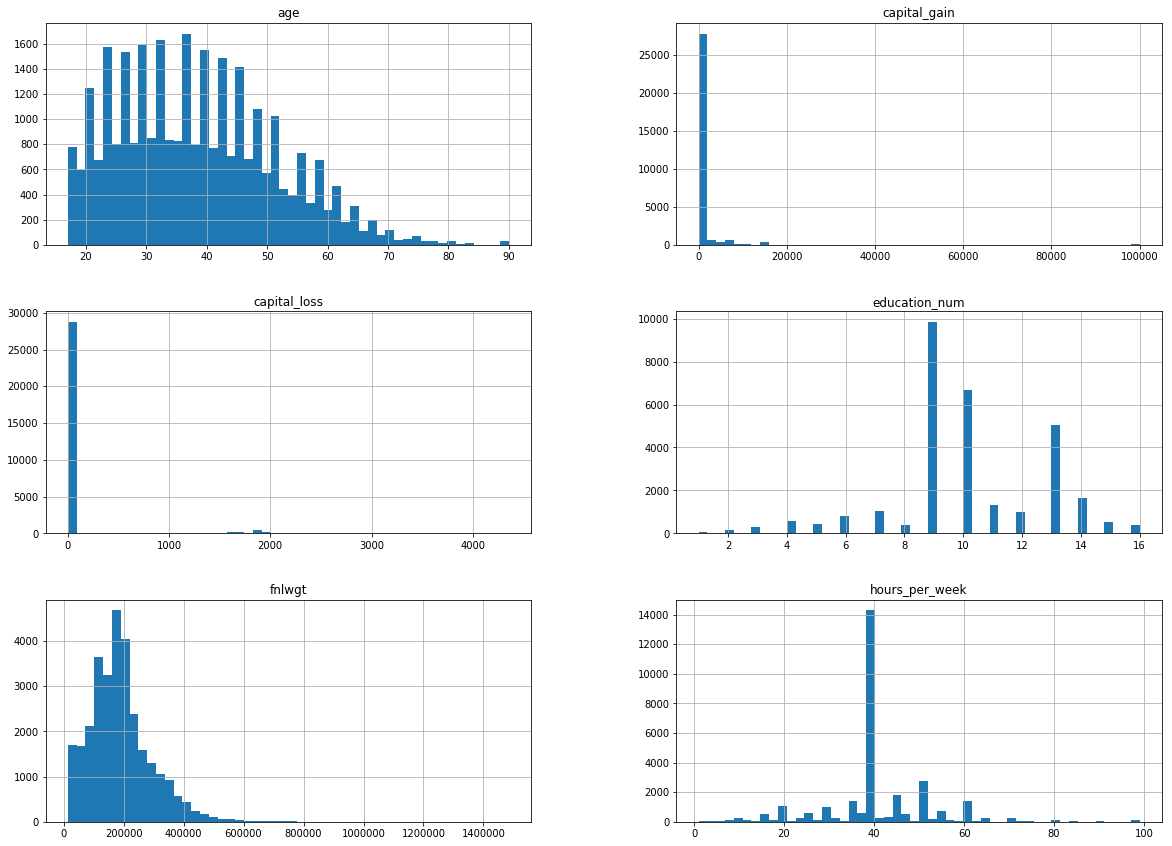

In [24]:
train_set[num_cols].hist(bins=50, figsize=(20,20), layout=(4,2))
plt.show()

### Data exploration (Bivariate)

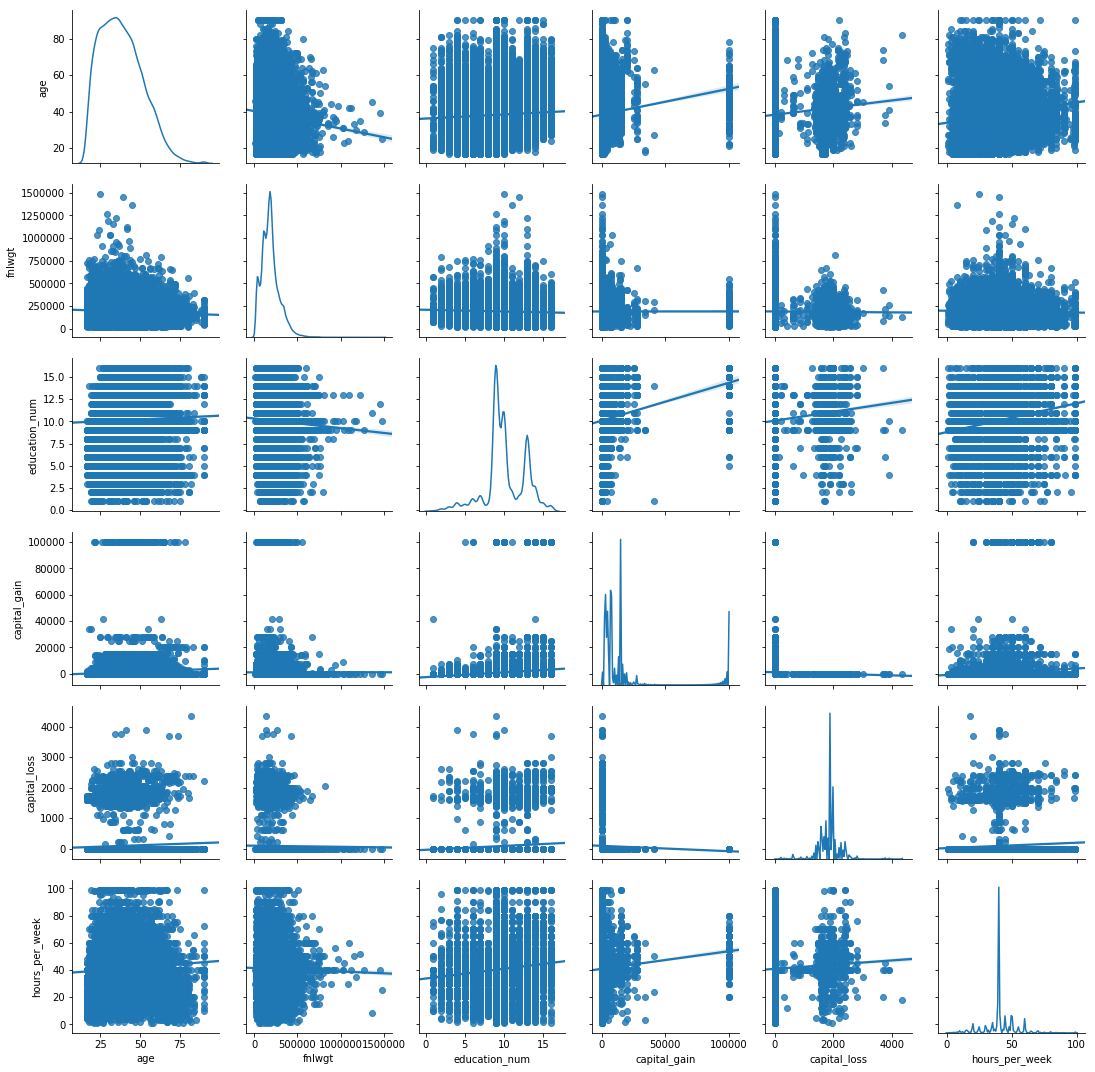

In [25]:
sns.pairplot(train_set[num_cols],kind ='reg',diag_kind='kde')

### Data exploration (Multivariate) 

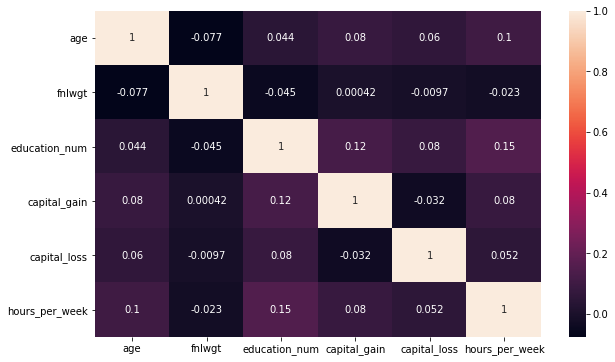

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(train_set.corr(), annot = True)

In [27]:
for col in train_set.columns: # Loop through all columns in the dataframe
    if train_set[col].dtype == 'object': # Only apply for columns with categorical strings
        train_set[col] = pd.Categorical(train_set[col]).codes # Replace strings with an integer

In [28]:
for col in test_set.columns: # Loop through all columns in the dataframe
    if test_set[col].dtype == 'object': # Only apply for columns with categorical strings
        test_set[col] = pd.Categorical(test_set[col]).codes # Replace strings with an integer

### Preparing training and testing data

In [29]:
x_train = train_set.drop('wage_class', axis =1)
y_train = train_set['wage_class']
x_test = test_set.drop('wage_class', axis =1)
y_test = test_set['wage_class']

In [30]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((30162, 14), (30162,), (15060, 14), (15060,))

### Fitting Model

### Logistic Regression

In [31]:
log_res = LogisticRegression()
model_lr = log_res.fit(x_train, y_train)


### Prediction

In [32]:
y_test_pred = model_lr.predict(x_test)
y_test_pred_prob = model_lr.predict_proba(x_test)

### Evaluate

In [33]:
# Generate model evaluation metrics for the Logistic Regression
print("Performance metrics of the model for the Logistic Regression")
print("-"*100)
print("Accuracy:\t ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision Score: ",metrics.precision_score(y_test, y_test_pred))
print("Recall Score:\t ",metrics.recall_score(y_test, y_test_pred))
print("AUROC Score:\t ",metrics.roc_auc_score(y_test,  y_test_pred_prob[:,1]))
print()
print("Confusion Matrix:  \n ",metrics.confusion_matrix(y_test, y_test_pred))
print()
print("Classification Report:\n ",metrics.classification_report(y_test, y_test_pred))

Performance metrics of the model for the Logistic Regression
----------------------------------------------------------------------------------------------------
Accuracy:	  0.7847941567065073
Precision Score:  0.6284275321768327
Recall Score:	  0.3035135135135135
AUROC Score:	  0.7567870551008756

Confusion Matrix:  
  [[10696   664]
 [ 2577  1123]]

Classification Report:
               precision    recall  f1-score   support

          0       0.81      0.94      0.87     11360
          1       0.63      0.30      0.41      3700

avg / total       0.76      0.78      0.76     15060



### Modelling Other classifiers

In [34]:
classifiers = [
            ("Logistic Regression - ", LogisticRegression()),
            ("K-Nearest Neighbors - ",  KNeighborsClassifier(2)),
            ("Naive Bayes - ",  GaussianNB()),
            ("Decision Tree - ",  DecisionTreeClassifier(max_depth=5)),
            ("Random Forest - ",  RandomForestClassifier(n_estimators=100)),
            ("AdaBoost - ",  AdaBoostClassifier(n_estimators=100)),
            ("XGBoost - ", XGBClassifier(n_estimators=100,objective='binary:logistic'))]

### Fitting, Predicting and Evaluate all the models

In [35]:
# Fit , Predict and Generate model evaluation metrics
for clfrs in classifiers:
    clfrs[1].fit(x_train, y_train)
    y_test_pred= clfrs[1].predict(x_test)
    y_test_pred_prob= clfrs[1].predict_proba(x_test)
    print(clfrs[0],
          "\n\t Accuracy:\t ", metrics.accuracy_score(y_test, y_test_pred),
          "\n\t Precision Score:",metrics.precision_score(y_test, y_test_pred),
          "\n\t Recall Score:\t ",metrics.recall_score(y_test, y_test_pred),
          "\n\t AUROC Score:\t ",metrics.roc_auc_score(y_test,  y_test_pred_prob[:,1]),
          "\n\t Confusion Matrix:  \n ",metrics.confusion_matrix(y_test, y_test_pred),
          "\n\t Classification Report:\n ",metrics.classification_report(y_test, y_test_pred),"\n")

Logistic Regression -  
	 Accuracy:	  0.7847941567065073 
	 Precision Score: 0.6284275321768327 
	 Recall Score:	  0.3035135135135135 
	 AUROC Score:	  0.7567870551008756 
	 Confusion Matrix:  
  [[10696   664]
 [ 2577  1123]] 
	 Classification Report:
               precision    recall  f1-score   support

          0       0.81      0.94      0.87     11360
          1       0.63      0.30      0.41      3700

avg / total       0.76      0.78      0.76     15060
 

K-Nearest Neighbors -  
	 Accuracy:	  0.7768924302788844 
	 Precision Score: 0.6010701545778835 
	 Recall Score:	  0.27324324324324323 
	 AUROC Score:	  0.6567672249714503 
	 Confusion Matrix:  
  [[10689   671]
 [ 2689  1011]] 
	 Classification Report:
               precision    recall  f1-score   support

          0       0.80      0.94      0.86     11360
          1       0.60      0.27      0.38      3700

avg / total       0.75      0.78      0.74     15060
 

Naive Bayes -  
	 Accuracy:	  0.7885790172642763 
	 Pre

### Decision Tree, Random Forest, Adaboost and XGBoost classifiers seems to be providing more accuracy so we can choose those for further optimization.
### Model validation 

In [36]:
scoring = 'accuracy'
results=[]
names=[]
for clsfr_name, model in classifiers:
    kfold = KFold(n_splits=10, random_state=100)
    cv_results = cross_val_score(model, x_train,y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(clsfr_name)
    print(clsfr_name,
                      "\n\t Mean:\t", cv_results.mean(),
                    "\n\t Std. Dev:",  cv_results.std(),"\n")

Logistic Regression -  
	 Mean:	 0.7868509700556264 
	 Std. Dev: 0.004284707385989494 

K-Nearest Neighbors -  
	 Mean:	 0.7798556302086584 
	 Std. Dev: 0.005827837382234451 

Naive Bayes -  
	 Mean:	 0.7885088169690938 
	 Std. Dev: 0.006169737575906988 

Decision Tree -  
	 Mean:	 0.8442083278750212 
	 Std. Dev: 0.008626557214177911 

Random Forest -  
	 Mean:	 0.8534250102645574 
	 Std. Dev: 0.0066240477100015195 

AdaBoost -  
	 Mean:	 0.8620121917445702 
	 Std. Dev: 0.006018891855664965 

XGBoost -  
	 Mean:	 0.8598571621993495 
	 Std. Dev: 0.005960042174289529 



## Tuning Models
### Decision Trees

In [37]:
param_grid = {'criterion':['gini','entropy'],
              'max_depth':[2, 3, 4,5, 6, 7, 8, 9],
              'random_state':[100],
              'splitter':['best']}

DTree_grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv = 5, verbose=1)

DTree_grid.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    5.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 'random_state': [100], 'splitter': ['best']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [38]:
DTree_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'random_state': 100,
 'splitter': 'best'}

In [39]:
model = DTree_grid.best_estimator_
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

In [40]:
model.score(x_test, y_test)

0.849203187250996

In [41]:
# Generate model evaluation metrics for the Decision Tree Classifier - Hyperparameter Tuned
def print_Performance_Maatrices(y_test_data,y_test_pred_data):
    print("-"*100)
    print("Accuracy:\t ", metrics.accuracy_score(y_test_data, y_test_pred_data))
    print("Precision Score: ",metrics.precision_score(y_test_data, y_test_pred_data))
    print("Recall Score:\t ",metrics.recall_score(y_test_data, y_test_pred_data))
    
    print()
    print("Confusion Matrix:  \n ",metrics.confusion_matrix(y_test_data, y_test_pred_data))
    print()
    print("Classification Report:\n ",metrics.classification_report(y_test_data, y_test_pred_data))

In [42]:
print("Performance metrics of the model for the Decision Tree Classifier - Hyperparameter Tuned")
print_Performance_Maatrices(y_test,y_test_pred)

Performance metrics of the model for the Decision Tree Classifier - Hyperparameter Tuned
----------------------------------------------------------------------------------------------------
Accuracy:	  0.849203187250996
Precision Score:  0.7975843398583924
Recall Score:	  0.5175675675675676

Confusion Matrix:  
  [[10874   486]
 [ 1785  1915]]

Classification Report:
               precision    recall  f1-score   support

          0       0.86      0.96      0.91     11360
          1       0.80      0.52      0.63      3700

avg / total       0.84      0.85      0.84     15060



In [44]:
DTree_best = pickle.dumps(DTree_grid.best_estimator_)

### Random Forest

In [45]:
param_grid = {'criterion':['gini','entropy'],
              'max_depth':[2, 3, 4, 5, 6, 7, 8, 9],
              'n_estimators':[200,400,600],
              'n_jobs':[-1], 
              'random_state':[100],
              'verbose': [0]}

RForest_grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv = 5, verbose=1)

In [46]:
RForest_grid.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 12.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 'n_estimators': [200, 400, 600], 'n_jobs': [-1], 'random_state': [100], 'verbose': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [47]:
RForest_grid.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'n_estimators': 400,
 'n_jobs': -1,
 'random_state': 100,
 'verbose': 0}

In [48]:
model = RForest_grid.best_estimator_
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

In [49]:
model.score(x_test, y_test)

0.8523240371845949

In [50]:
print("Performance metrics of the model for the Random Forest Tree Classifier - Hyperparameter Tuned")
print_Performance_Maatrices(y_test,y_test_pred)

Performance metrics of the model for the Random Forest Tree Classifier - Hyperparameter Tuned
----------------------------------------------------------------------------------------------------
Accuracy:	  0.8523240371845949
Precision Score:  0.7973408541498791
Recall Score:	  0.5348648648648648

Confusion Matrix:  
  [[10857   503]
 [ 1721  1979]]

Classification Report:
               precision    recall  f1-score   support

          0       0.86      0.96      0.91     11360
          1       0.80      0.53      0.64      3700

avg / total       0.85      0.85      0.84     15060



In [51]:
RForest_best = pickle.dumps(RForest_grid.best_estimator_)

### Adaboost

In [52]:
AdaBoostClassifier()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [53]:
param_grid = {'algorithm':['SAMME.R'],
              'learning_rate':[0.1, 0.2, 0.3],
              'n_estimators':[200,400,600],
              'random_state':[100]}

AdaBoost_grid = GridSearchCV(AdaBoostClassifier(), param_grid=param_grid, cv = 5, verbose=1)

In [54]:
AdaBoost_grid.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  5.7min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'algorithm': ['SAMME.R'], 'learning_rate': [0.1, 0.2, 0.3], 'n_estimators': [200, 400, 600], 'random_state': [100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [55]:
AdaBoost_grid.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.3,
 'n_estimators': 600,
 'random_state': 100}

In [56]:
model = AdaBoost_grid.best_estimator_
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

In [57]:
model.score(x_test, y_test)

0.8598937583001328

In [58]:
print("Performance metrics of the model for the AdaBoost Classifier - Hyperparameter Tuned")
print_Performance_Maatrices(y_test,y_test_pred)

Performance metrics of the model for the AdaBoost Classifier - Hyperparameter Tuned
----------------------------------------------------------------------------------------------------
Accuracy:	  0.8598937583001328
Precision Score:  0.7693089430894309
Recall Score:	  0.6137837837837837

Confusion Matrix:  
  [[10679   681]
 [ 1429  2271]]

Classification Report:
               precision    recall  f1-score   support

          0       0.88      0.94      0.91     11360
          1       0.77      0.61      0.68      3700

avg / total       0.85      0.86      0.85     15060



### XGBoost

In [59]:
param_grid = {'learning_rate':[0.1, 0.2, 0.3],
              'max_depth':[2, 4, 7],
              'n_estimators':[200,400,600],
              'n_jobs':[-1], 
              'objective':['binary:logistic'],
              'random_state':[100],
              'reg_alpha':[0.1, 1, 10], 
              'scale_pos_weight':[1], 
              'silent':[True]}

XGBoost_grid = GridSearchCV(XGBClassifier(), param_grid=param_grid, cv = 5, verbose=1)

In [60]:
XGBoost_grid.fit(x_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed: 45.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [2, 4, 7], 'n_estimators': [200, 400, 600], 'n_jobs': [-1], 'objective': ['binary:logistic'], 'random_state': [100], 'reg_alpha': [0.1, 1, 10], 'scale_pos_weight': [1], 'silent': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [61]:
XGBoost_grid.best_params_

{'learning_rate': 0.2,
 'max_depth': 4,
 'n_estimators': 200,
 'n_jobs': -1,
 'objective': 'binary:logistic',
 'random_state': 100,
 'reg_alpha': 0.1,
 'scale_pos_weight': 1,
 'silent': True}

In [62]:
model = XGBoost_grid.best_estimator_
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

In [63]:
model.score(x_test, y_test)

0.8699867197875166

In [64]:
print("Performance metrics of the model for the XGBoost Classifier - Hyperparameter Tuned")
print_Performance_Maatrices(y_test,y_test_pred)

Performance metrics of the model for the XGBoost Classifier - Hyperparameter Tuned
----------------------------------------------------------------------------------------------------
Accuracy:	  0.8699867197875166
Precision Score:  0.8108493932905068
Recall Score:	  0.614054054054054

Confusion Matrix:  
  [[10830   530]
 [ 1428  2272]]

Classification Report:
               precision    recall  f1-score   support

          0       0.88      0.95      0.92     11360
          1       0.81      0.61      0.70      3700

avg / total       0.87      0.87      0.86     15060



In [65]:
XGBoost_best = pickle.dumps(XGBoost_grid.best_estimator_)

### Clearly XGBoost offers better Accuracy, Precision and Recall when compared to the other Classifiers. Therefore, we choose it as our model. The following are the hyper-parameters of the model:

In [66]:
XGBoost_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=100, reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [67]:
# Saving the the chosen model in the pickle object
selected_model = pickle.dumps(XGBoost_grid.best_estimator_)

In [68]:
#To Load:
pickle.loads(selected_model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=nan, n_estimators=200,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=100, reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)